# **FETAL HEALTH CLASSIFICATION: ML PROJECT 2**

###**1) PLANTEAMIENTO DEL PROBLEMA**

####**Definir objetivo:**

La cardiotocografía (CTG) se utiliza durante el embarazo para controlar la frecuencia cardíaca fetal y las contracciones uterinas. Permite controlar el bienestar fetal y permite la detección temprana del sufrimiento fetal.

La interpretación de CTG ayuda a determinar si el embarazo es de alto o bajo riesgo. Una CTG anormal puede indicar la necesidad de realizar más investigaciones y una posible intervención.

El objetivo de este proyecto es predecir la salud fetal.

Clasificar la salud fetal para prevenir la mortalidad infantil y materna. Obtener información sobre la columna "fetal_health" que fue clasificada por tres obstetras expertas en 3 clases:

Normal
Sospechoso
Patológico
Para hacerlo, analizaremos y visualizaremos la columna de destino (fetal_health).

####**Tipo de problema:**

Supervisado. Es claramente un problema de clasificación y las predicciones se llevan a cabo sobre un conjunto de registros de características extraídas de exámenes de cardiotocograma. Practicaremos algoritmos de clasificación para lograr el menor error de predicción. Se estudiarán varias técnicas de clasificación, incluidas Logistic Regression, K- Nearest Neighbors, Random Forest Classifier, Gradient Boosting, XGBoost y Naive Bayes. Sus desempeños se compararán para determinar cuál funciona mejor con nuestro conjunto de datos.

###**2) OBTENER LOS DATOS**

####**Conjunto de datos:**

De Kaggle: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

In [ ]:
# Importar librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
np.random.seed(0)

In [ ]:
# Cargar datos

data = pd.read_csv("fetalhealth.csv")

In [ ]:
# Análisis Exploratorio de los datos

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [ ]:
data.shape

(2126, 22)

In [ ]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [ ]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [ ]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
data[data.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140,0.007,0.000,0.004,0.0,0.0,0.0,34,1.2,0,...,119,179,2,0,156,153,155,5,0,1
234,123,0.000,0.000,0.000,0.0,0.0,0.0,49,0.8,7,...,63,137,2,0,129,127,129,2,1,1
306,145,0.000,0.020,0.000,0.0,0.0,0.0,77,0.2,45,...,129,150,1,0,146,145,147,0,1,2
324,135,0.000,0.000,0.000,0.0,0.0,0.0,62,0.5,71,...,71,168,3,0,143,142,144,1,1,3
333,144,0.000,0.019,0.000,0.0,0.0,0.0,76,0.4,61,...,71,152,3,0,145,144,146,2,1,2
787,123,0.003,0.003,0.000,0.0,0.0,0.0,52,0.8,2,...,50,140,7,0,129,128,130,4,1,1
791,123,0.003,0.004,0.000,0.0,0.0,0.0,50,0.9,4,...,58,140,7,0,129,128,130,5,1,1
798,146,0.000,0.000,0.003,0.0,0.0,0.0,65,0.4,39,...,137,156,1,0,150,149,151,1,1,2
849,138,0.002,0.000,0.004,0.0,0.0,0.0,41,0.8,8,...,105,156,4,0,142,142,143,2,1,1
1113,122,0.000,0.000,0.000,0.0,0.0,0.0,19,1.9,0,...,103,142,1,0,120,120,122,3,0,1


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


baseline value
Skew: 0.02
Stdv: 9.84


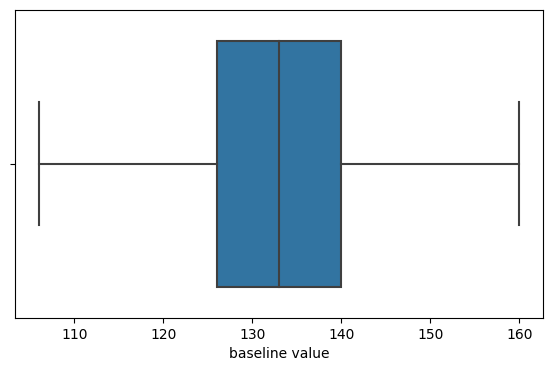

accelerations
Skew: 1.2
Stdv: 0.0


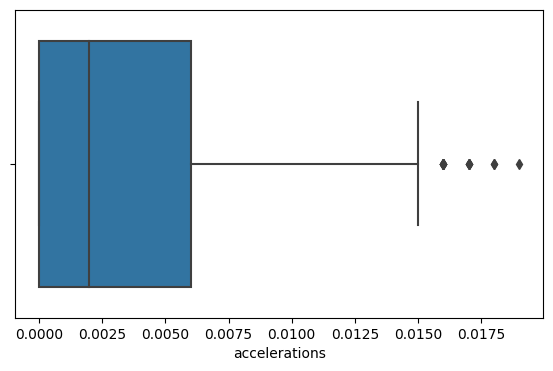

fetal_movement
Skew: 7.81
Stdv: 0.05


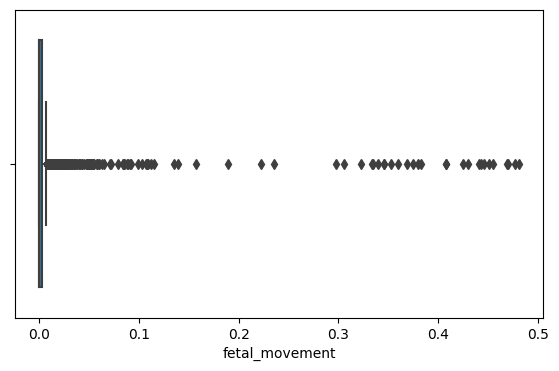

uterine_contractions
Skew: 0.16
Stdv: 0.0


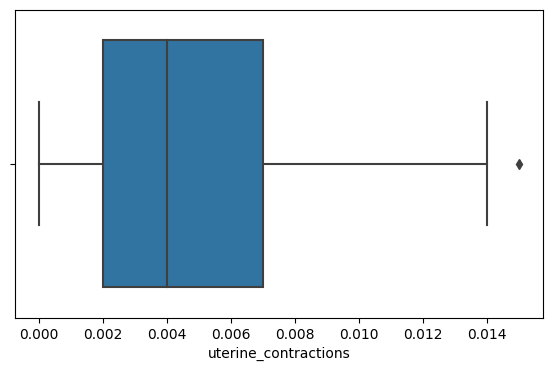

light_decelerations
Skew: 1.72
Stdv: 0.0


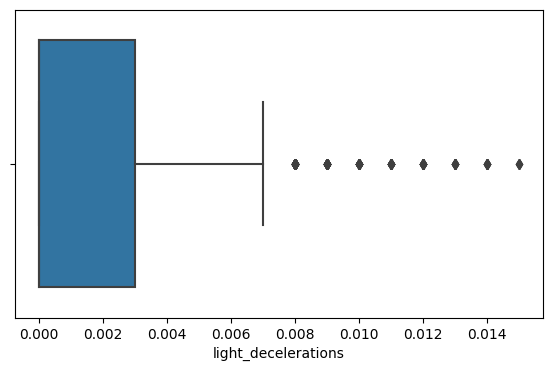

severe_decelerations
Skew: 17.35
Stdv: 0.0


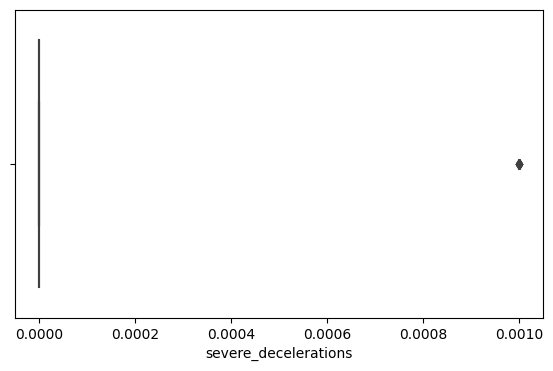

prolongued_decelerations
Skew: 4.32
Stdv: 0.0


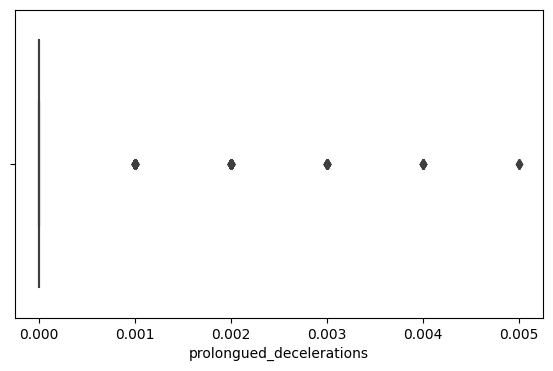

abnormal_short_term_variability
Skew: -0.01
Stdv: 17.19


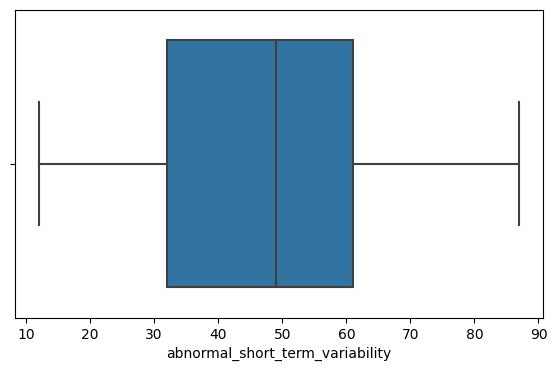

mean_value_of_short_term_variability
Skew: 1.66
Stdv: 0.88


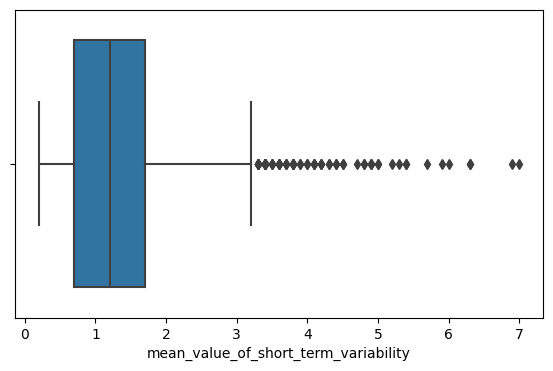

percentage_of_time_with_abnormal_long_term_variability
Skew: 2.2
Stdv: 18.4


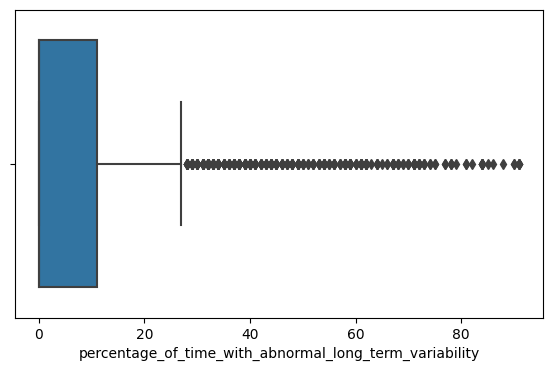

mean_value_of_long_term_variability
Skew: 1.33
Stdv: 5.63


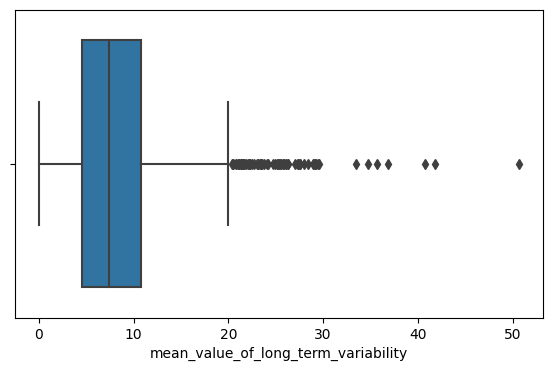

histogram_width
Skew: 0.31
Stdv: 38.96


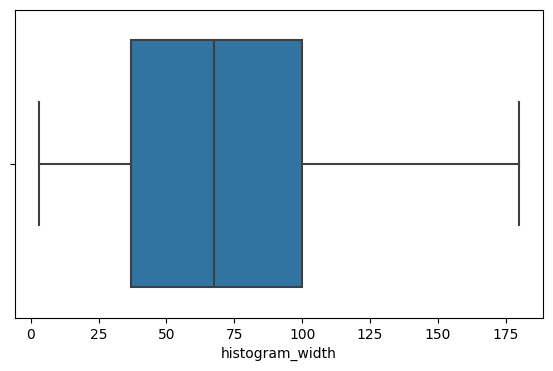

histogram_min
Skew: 0.12
Stdv: 29.56


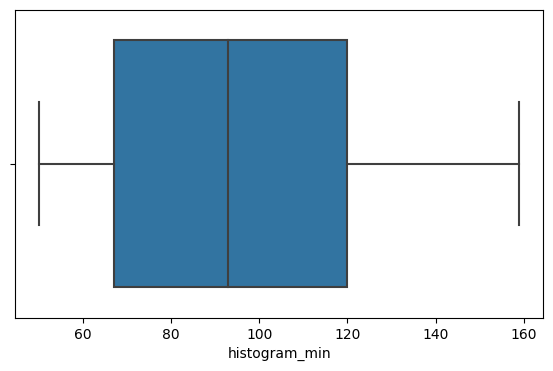

histogram_max
Skew: 0.58
Stdv: 17.94


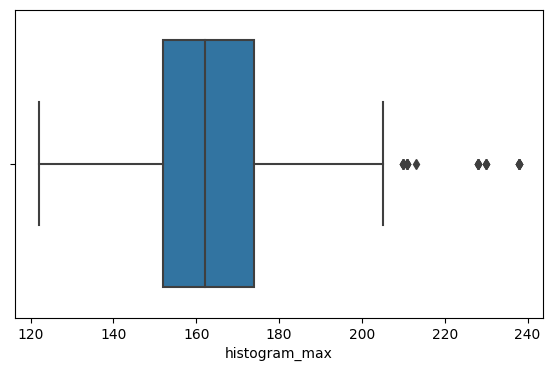

histogram_number_of_peaks
Skew: 0.89
Stdv: 2.95


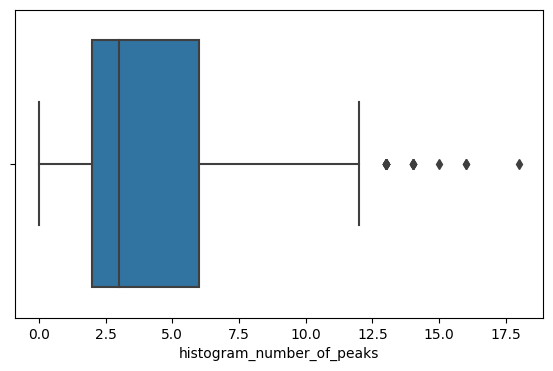

histogram_number_of_zeroes
Skew: 3.92
Stdv: 0.71


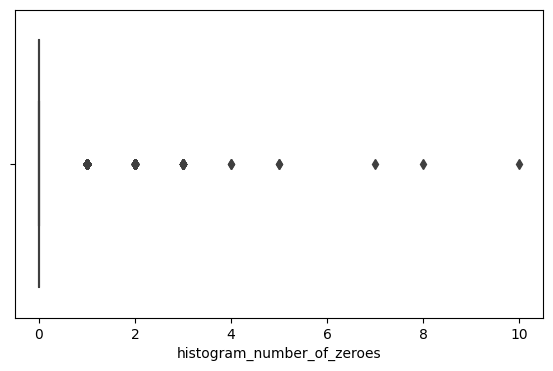

histogram_mode
Skew: -1.0
Stdv: 16.38


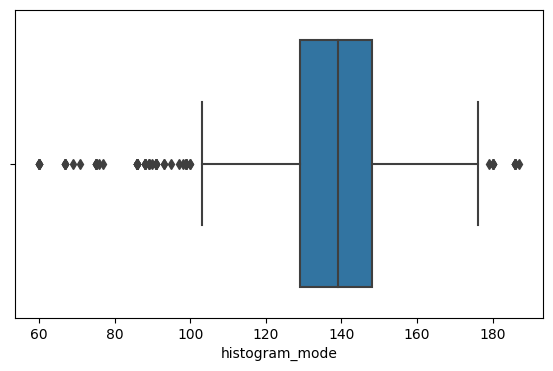

histogram_mean
Skew: -0.65
Stdv: 15.59


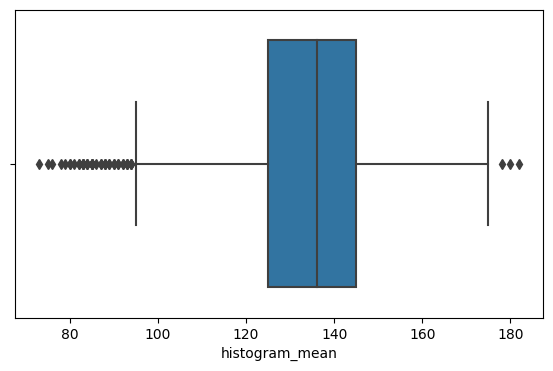

histogram_median
Skew: -0.48
Stdv: 14.47


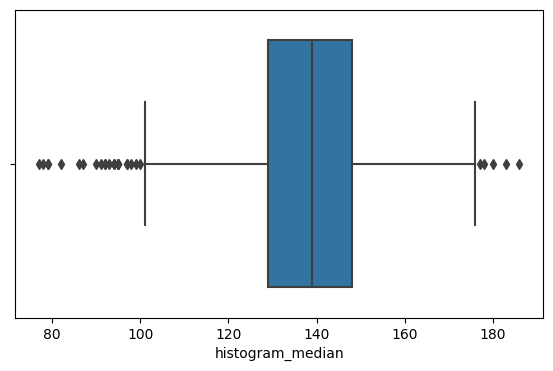

histogram_variance
Skew: 3.22
Stdv: 28.98


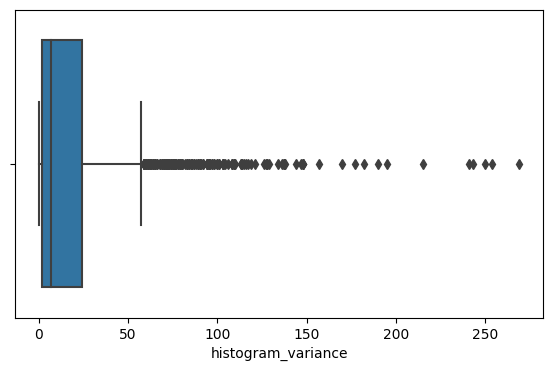

histogram_tendency
Skew: -0.31
Stdv: 0.61


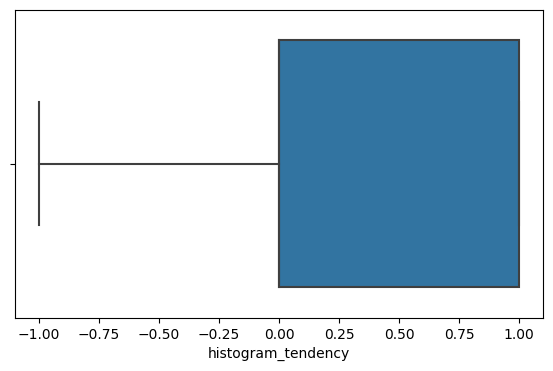

fetal_health
Skew: 1.85
Stdv: 0.61


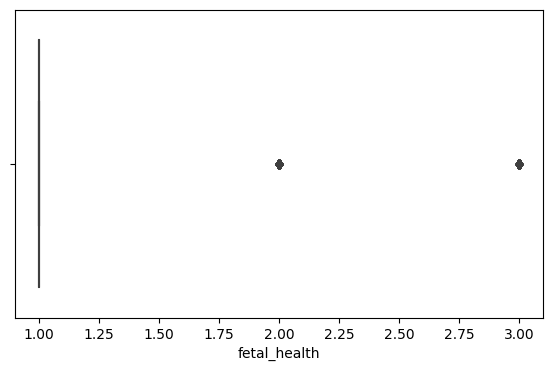

In [ ]:
# Análisis Gráfico

numeric_columns = data.select_dtypes(include=['int', 'float']).columns

for col in numeric_columns:
    print(col)
    print('Skew:', round(data[col].skew(), 2))
    print('Stdv:', round(data[col].std(), 2))

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])

    plt.show()

Detecté valores atípicos en nuestro conjunto de datos. Sin embargo, no es una buena idea eliminarlos todavía, ya que podría provocar un ajuste excesivo. Aunque podemos terminar con mejores estadísticas.

Una regla básica para los valores atípicos en cuestión es:

Es un error de medición o error de entrada de datos, corrija el error si es posible. Si no puede solucionarlo, elimine esa observación. En nuestro caso, este es el resultado de un informe CTG, por lo que es poco probable que se trate de un error de entrada de datos.

Si no es parte de la población que está estudiando, puede eliminar legítimamente el valor atípico. En este caso se trata del feto y los expertos etiquetan la clasificación. Sigamos con la opinión de los expertos.

Por tanto, suponiendo que ésta sea la parte natural de la población que estamos estudiando, no deberíamos eliminarla.

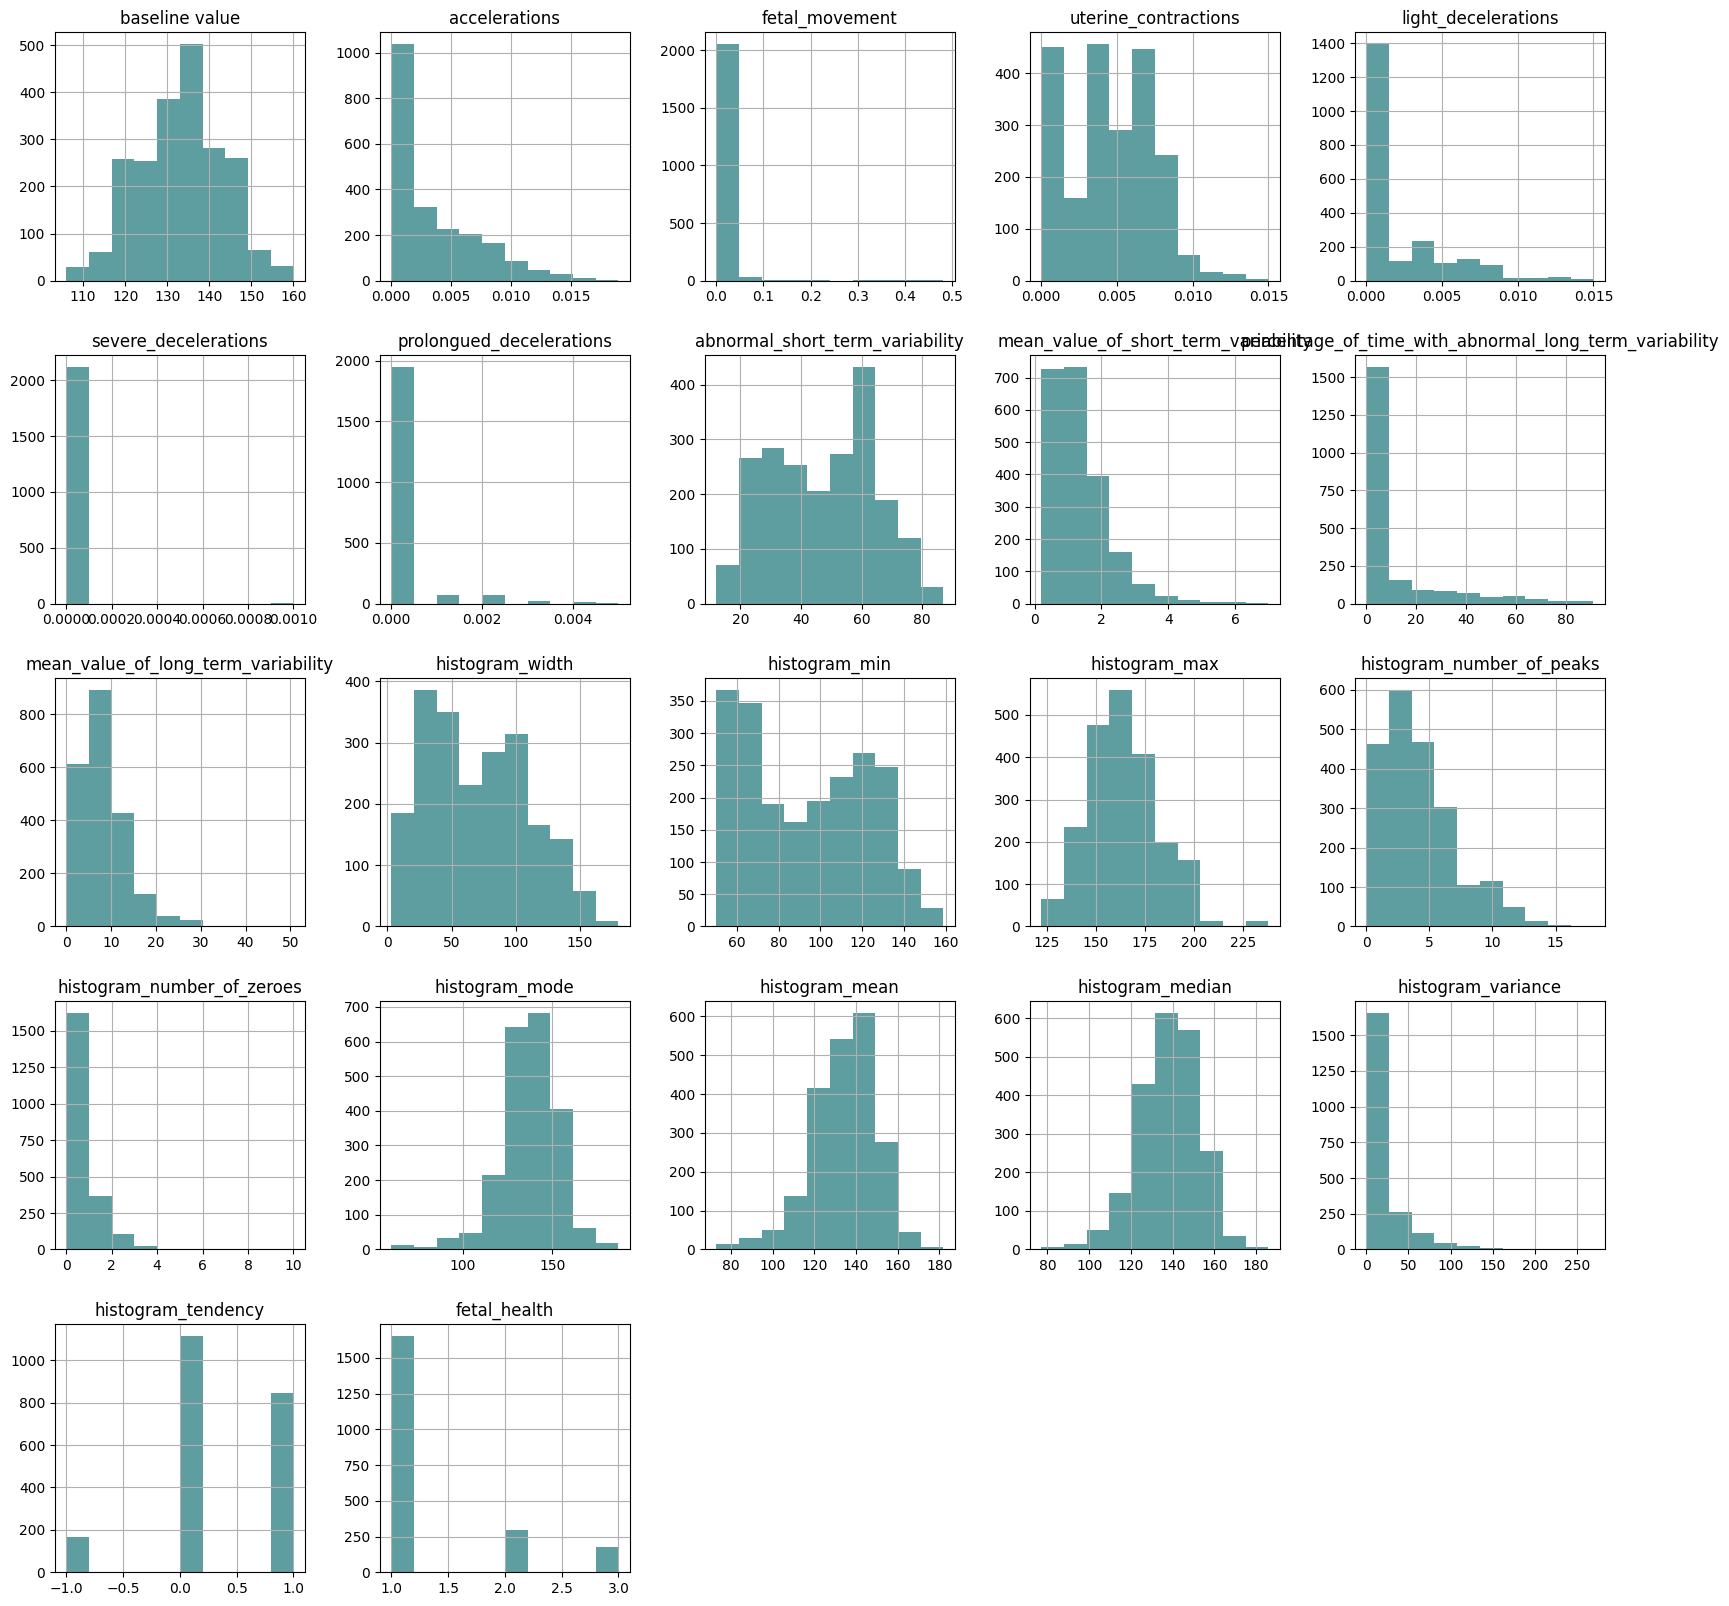

In [ ]:
data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

1    1655
2     295
3     176
Name: fetal_health, dtype: int64


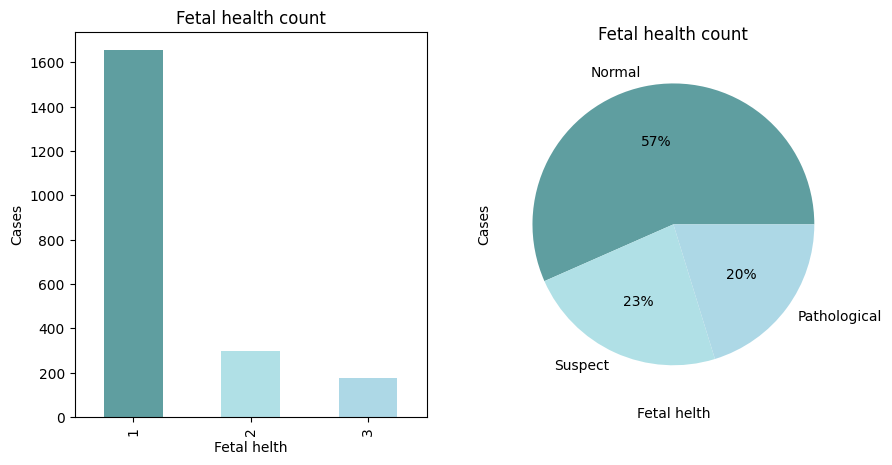

In [ ]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(data["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state")

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

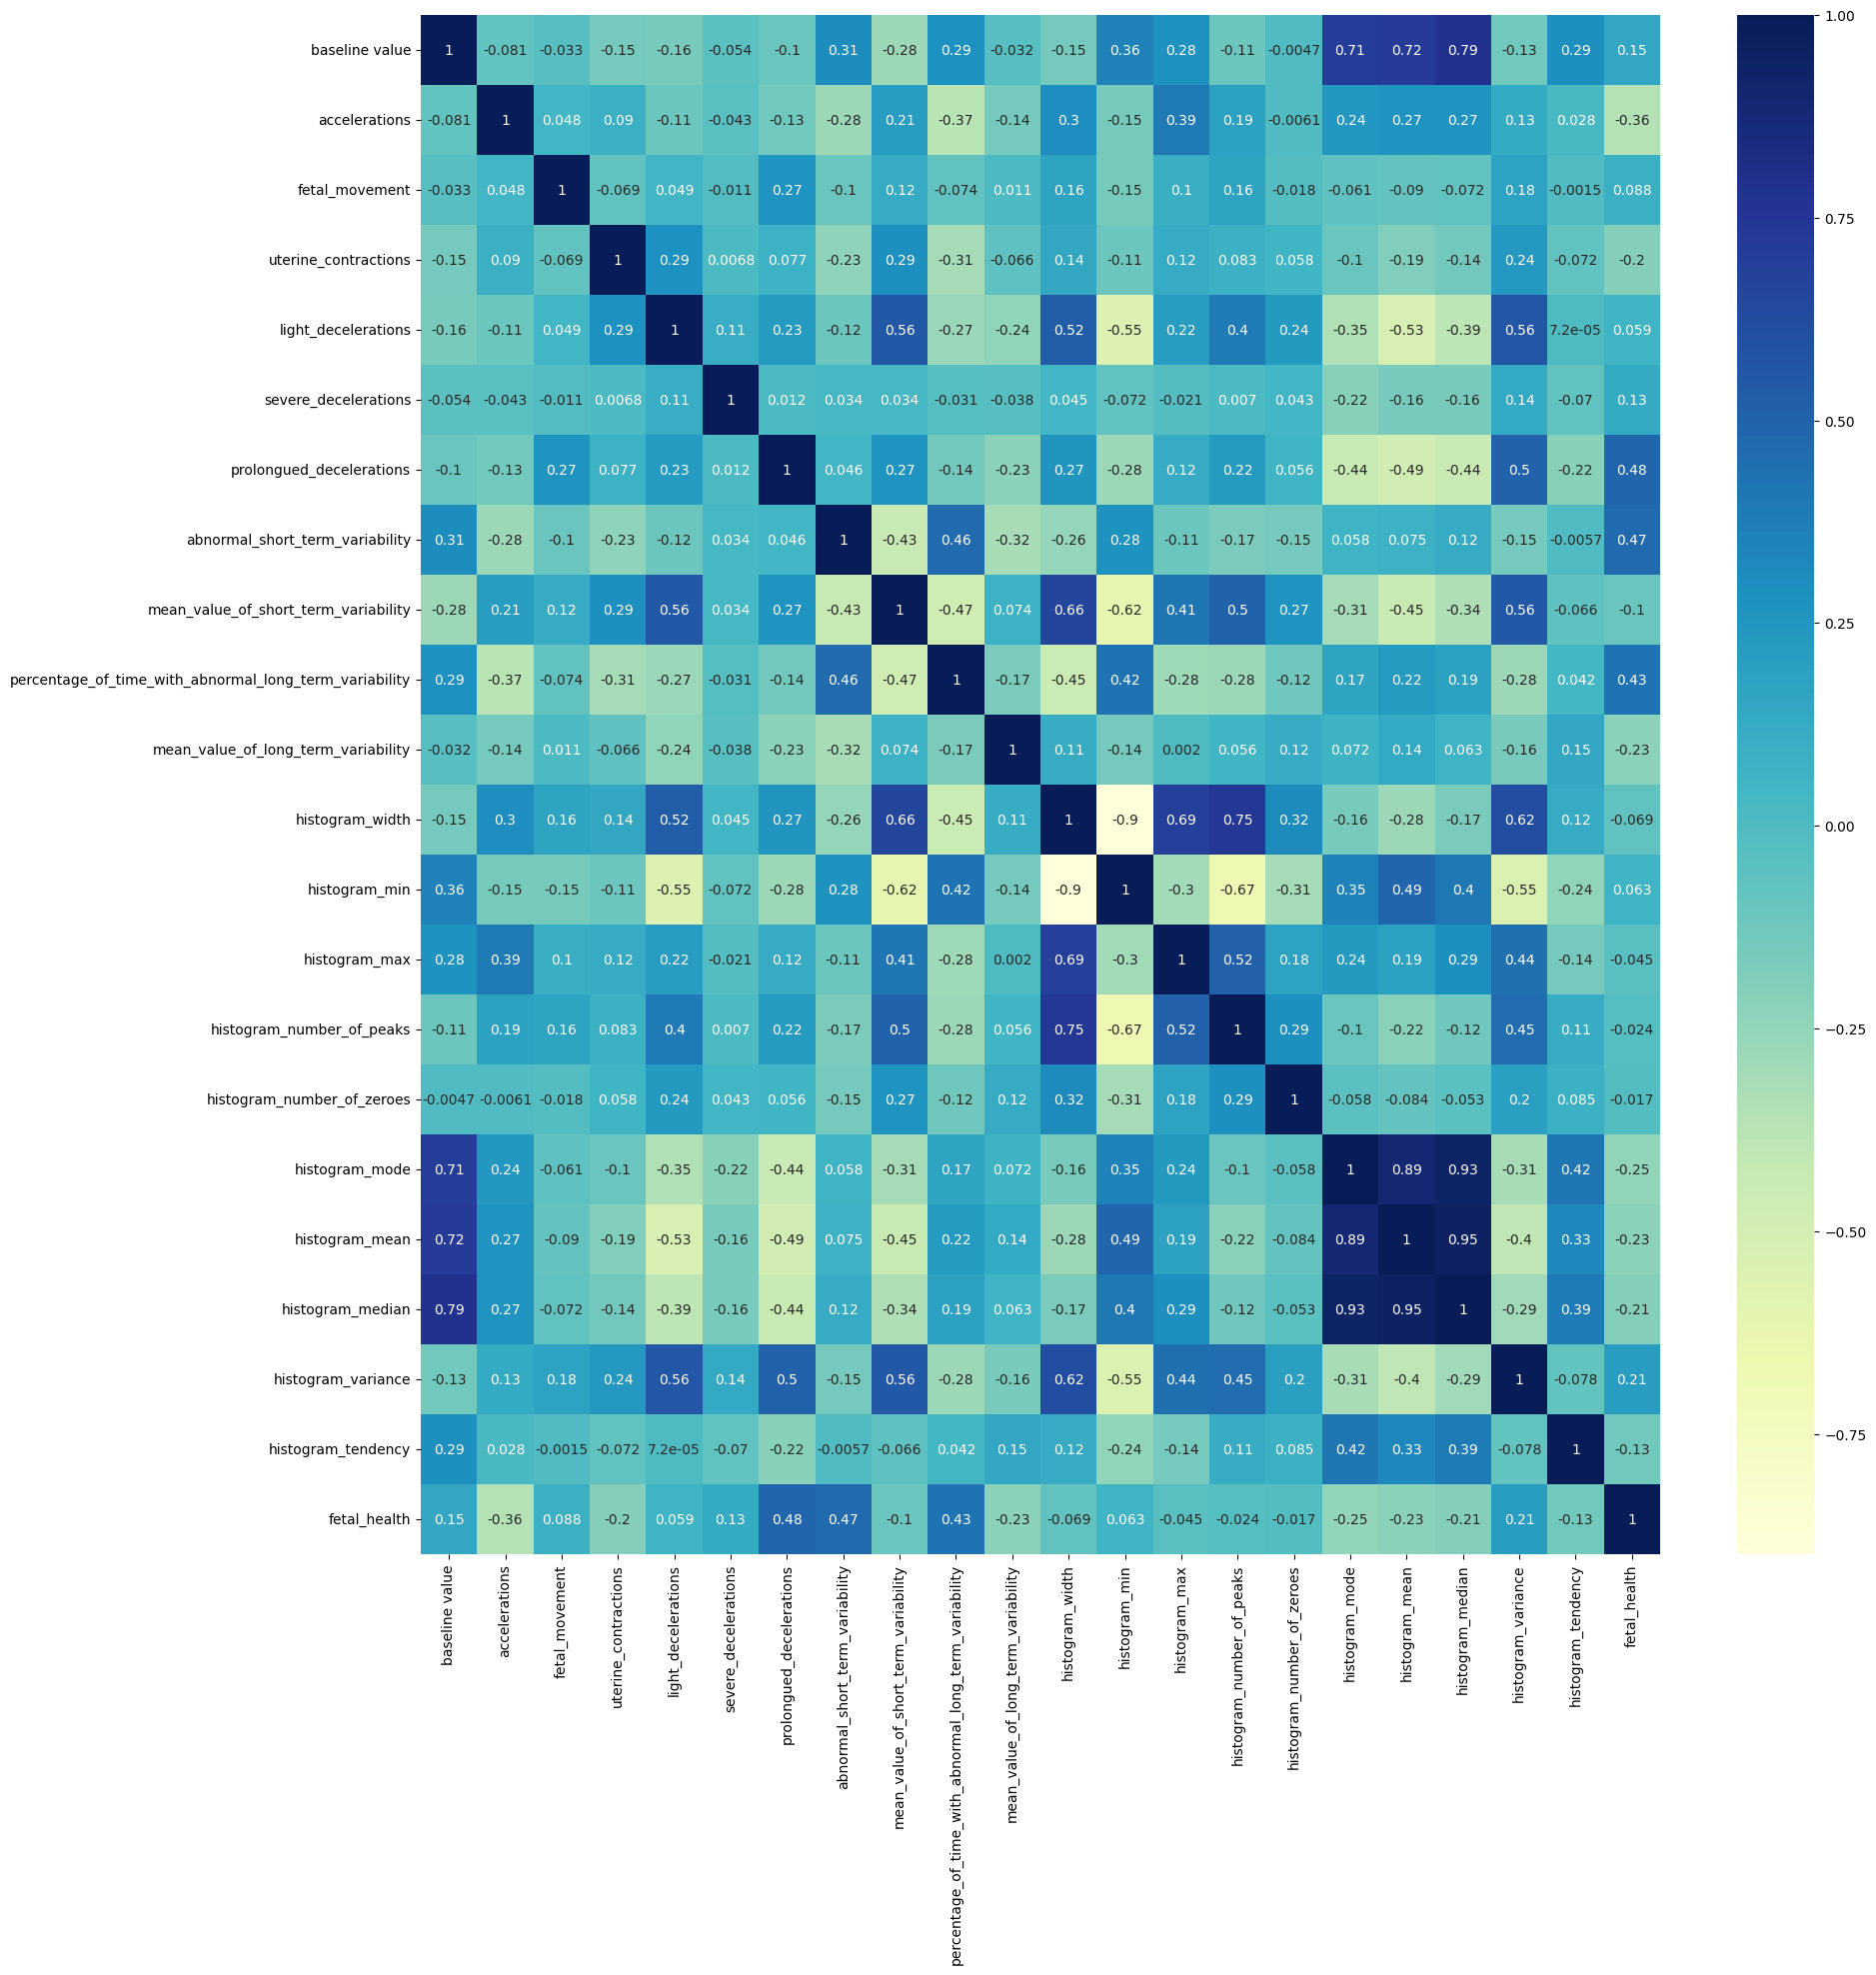

In [ ]:
# Matriz de Correlación
plt.figure(figsize  = (20,20))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Según la matriz de correlación, está claro que "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" y "mean_value_of_long_term_variability"son las características con mayor correlación con la fetal_health. Echemos un vistazo más de cerca a estos con fetal_movement en el eje y. Esto proporcionará una imagen más clara de las tendencias que indican la salud del feto.

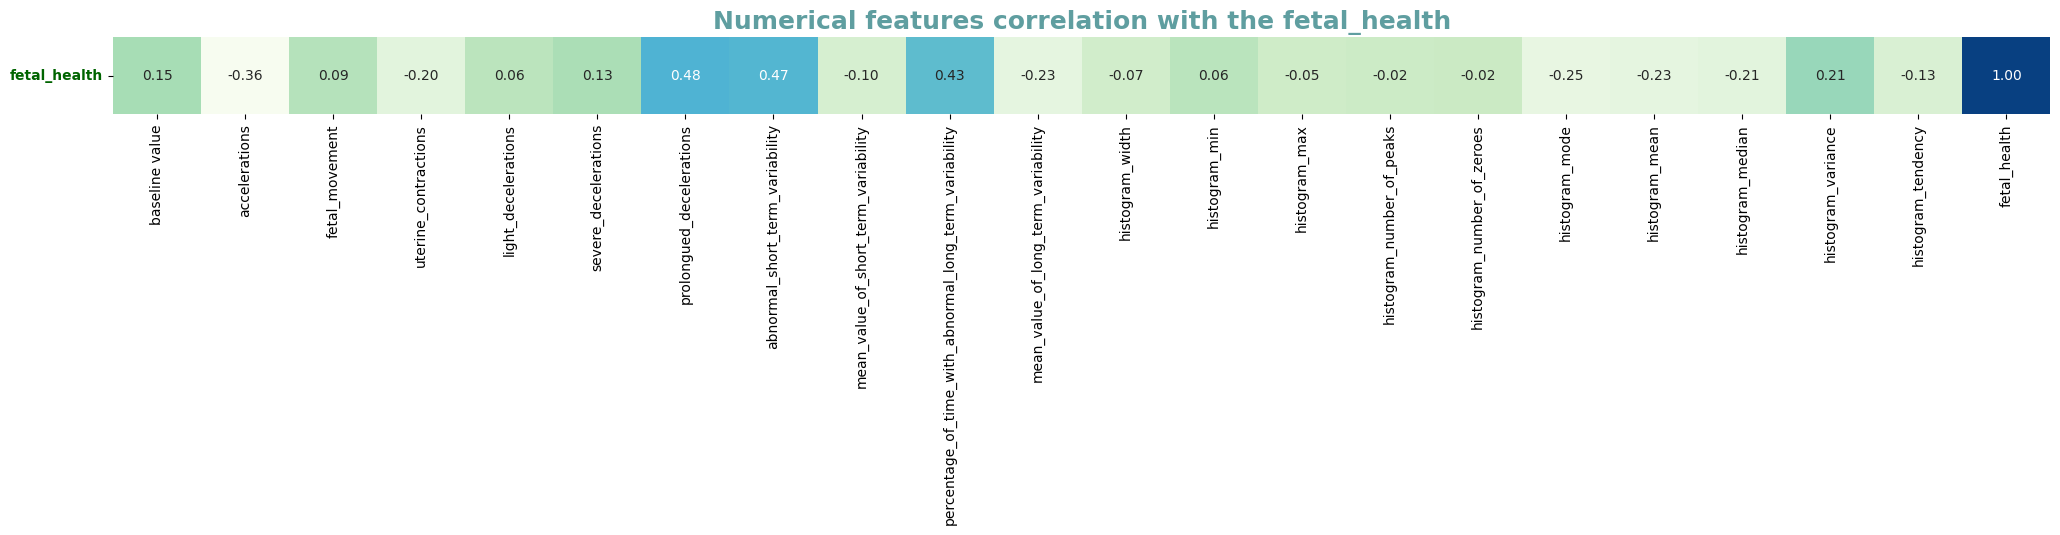

In [ ]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()

f, ax = plt.subplots(figsize=(25, 1))
# Utiliza annot=True para mostrar los valores de correlación en la gráfica
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1),
            cmap="GnBu",
            annot=True,  # Activa la visualización de los valores
            fmt=".2f",   # Formato de los valores (dos decimales)
            cbar=False)  # Desactiva la barra de color
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [ ]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


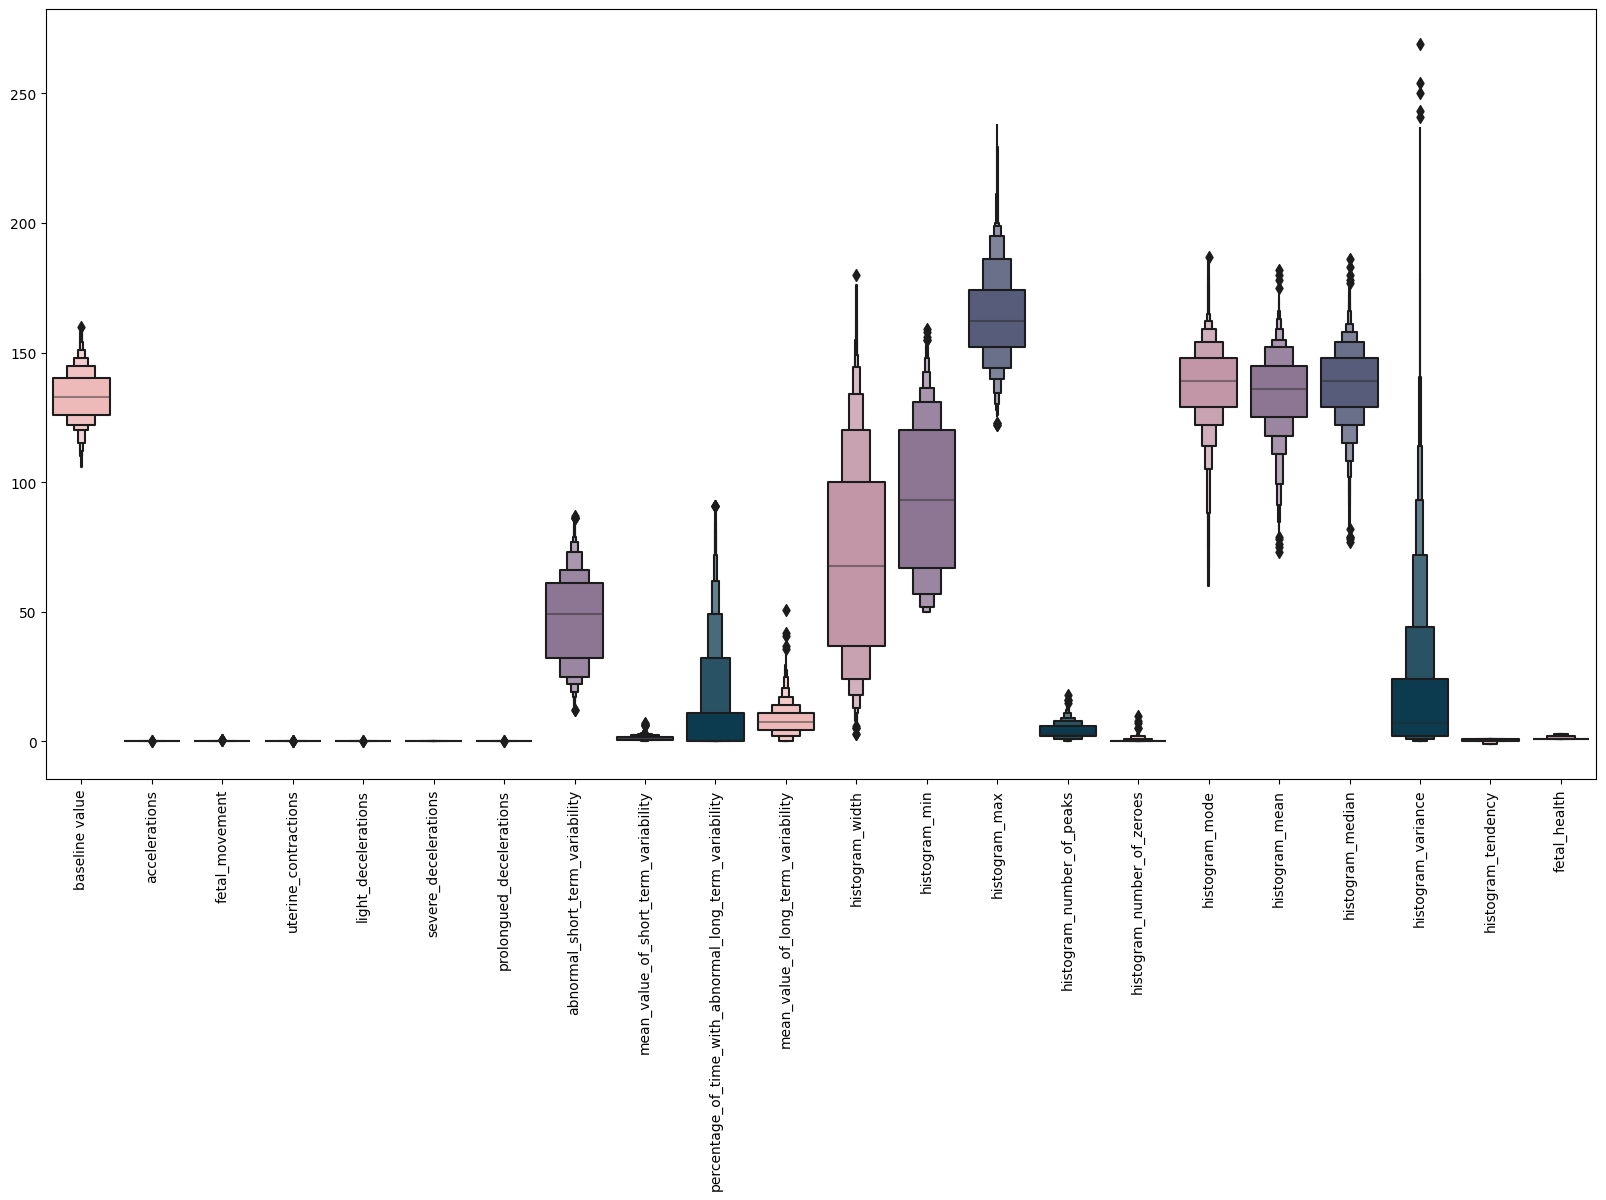

In [ ]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

El gráfico anterior muestra el rango de nuestros atributos de características. Todas las funciones están en diferentes rangos. Para encajar esto en un modelo debemos escalarlo al mismo rango.

En la construcción del modelo, preprocesaremos las características para hacer lo mismo.

In [ ]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [ ]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [ ]:
y = data["fetal_health"]

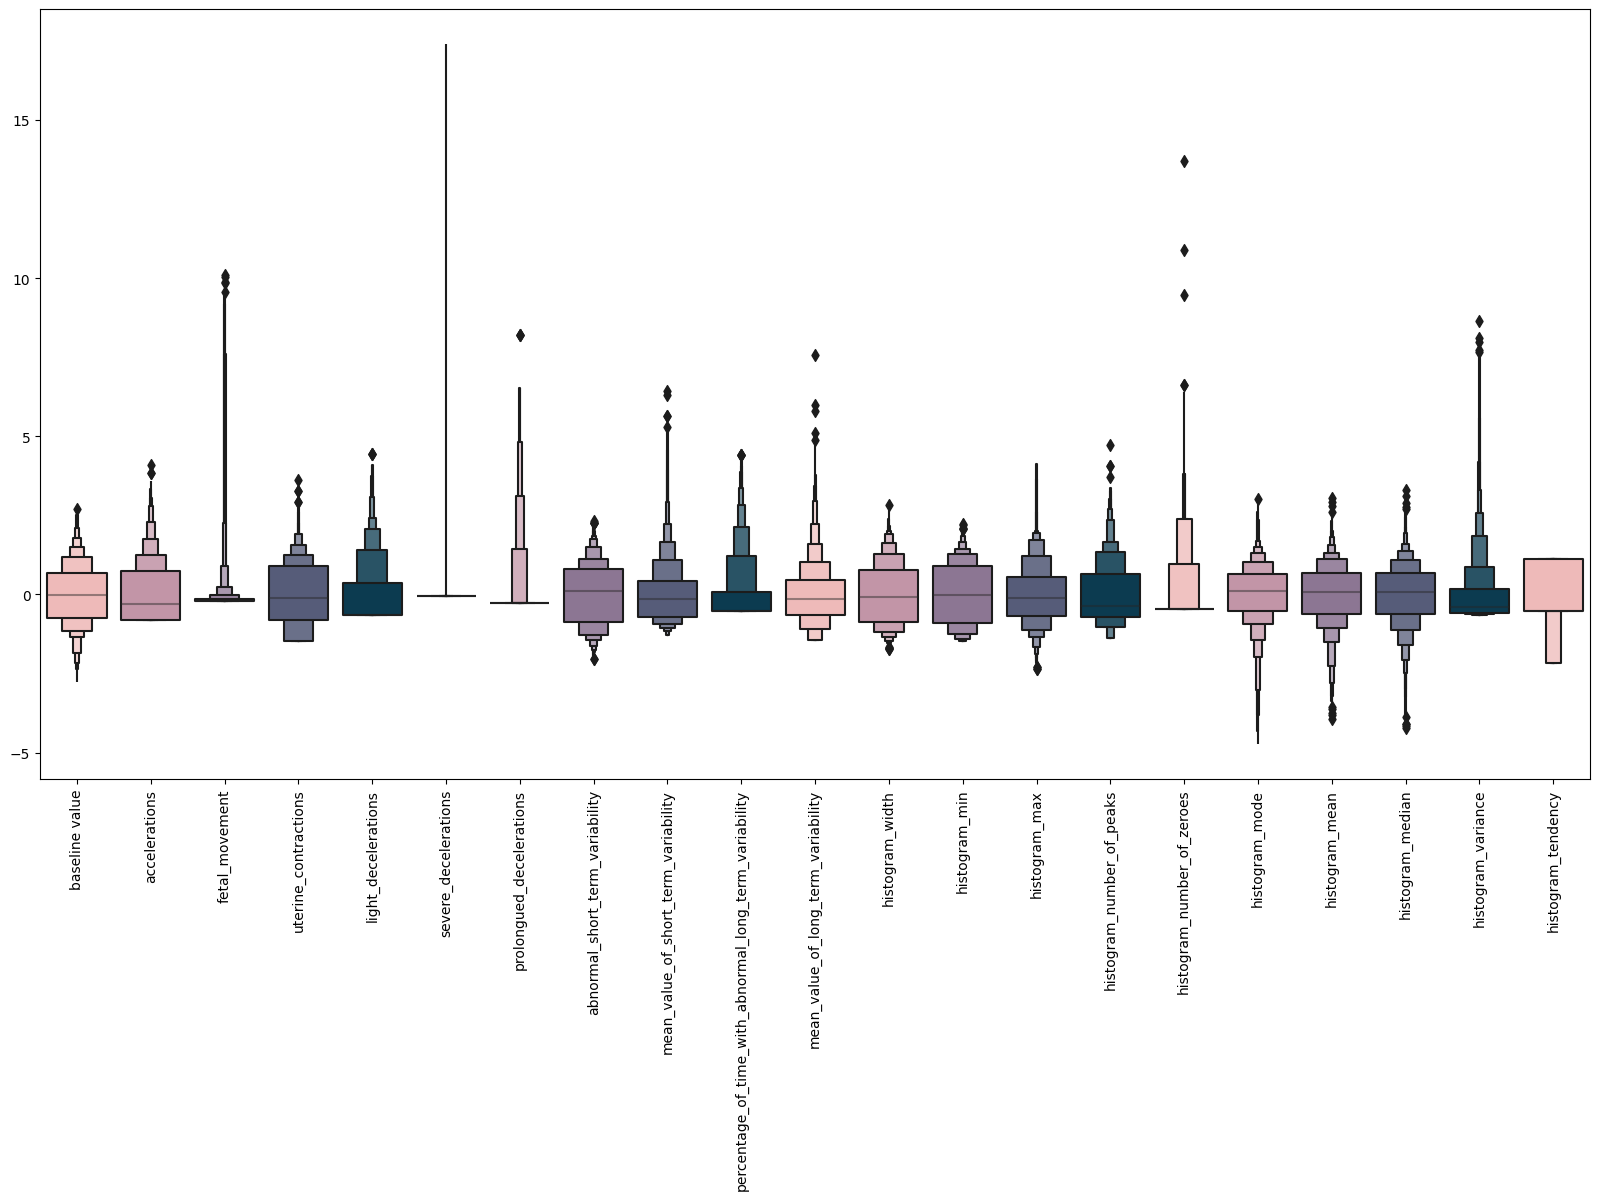

In [ ]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

##**Building Machine Learning Models:**

### **LOGISTIC REGRESSION**

In [ ]:
# Logistic Regression

# Baseline model of Logistic Regression with default parameters:

logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.893


### **LOGISTIC REGRESSION CROSS VALIDATION**

In [ ]:
# Cross Validation

cv_method = StratifiedKFold(n_splits=3,
                            )

In [ ]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.90927419 0.89717742 0.88306452]
CrossValMeans: 0.897
CrossValStandard Deviation: 0.011


### **LOGISTIC REGRESSION CROSS VALIDATION (BEST PARAMS)**

In [ ]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [ ]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(),
                                param_grid=params_LR,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
# Fit model with train data
GridSearchCV_LR.fit(X_train, y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Best estimator for LR model:
LogisticRegression(C=10)


In [ ]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 10, 'intercept_scaling': 1, 'tol': 0.0001}


In [ ]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.899


In [ ]:
# The grid search returns the following as the best parameter set
logistic_regression = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

In [ ]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 0.138
Root Mean Square Error for Logistic Regression = 0.371
R^2(coefficient of determination) on training set = 0.907
R^2(coefficient of determination) on testing set = 0.886


In [ ]:
metrics_data = {
    'Data': ['Train', 'Test'],
    'R^2': [score_logistic_regression_train, score_logistic_regression_test]
}

# Crea un DataFrame de pandas con los datos
metrics_df = pd.DataFrame(metrics_data)

# Muestra el DataFrame
print(metrics_df)

    Data       R^2
0  Train  0.906586
1   Test  0.885580


### **Model Performance Analysis**
Classification Report: Report which includes Precision, Recall and F1-Score.
Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       497
           2       0.60      0.66      0.63        88
           3       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.89      0.89      0.89       638



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[470  26   1]
 [ 29  58   1]
 [  4  12  37]]


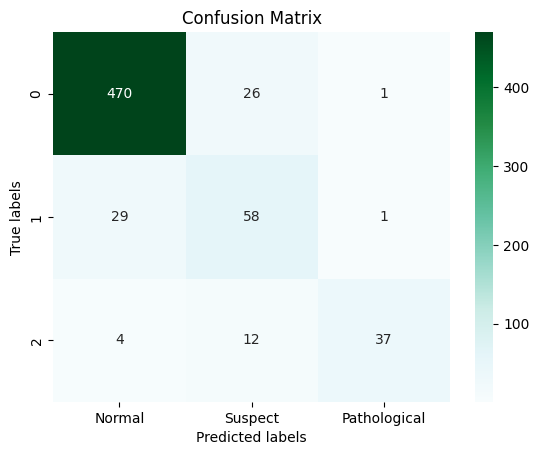

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax=ax, cmap="BuGn", fmt='d')

# labels, title, and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
plt.show()

### **K-NEAREST NEIGHBORS**

In [ ]:
knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")

pred_knn = knn_mod.predict(X_test)

Baseline K-Nearest Neighbors: 0.876


### **K-NEAREST NEIGHBORS CROSS VALIDATION**

In [ ]:
# Cross validate K-Nearest Neighbors model
cv_method = StratifiedKFold(n_splits=3,
                            )

scores_knn = cross_val_score(knn, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.90927419 0.89717742 0.89717742]
CrossValMeans: 0.901
CrossValStandard Deviation: 0.006


### **K-NEAREST NEIGHBORS CROSS VALIDATION (BEST PARAMS)**

In [ ]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [ ]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=params_knn,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=-1,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_knn.fit(X_train, y_train);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


In [ ]:
best_estimator_knn = GridSearchCV_knn.best_estimator_
print(f"Best estimator for KNN model:\n{best_estimator_knn}")

Best estimator for KNN model:
KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)


In [ ]:
best_score_knn = GridSearchCV_knn.best_score_
print(f"Best score for GNB model: {round(best_score_knn, 3)}")

Best score for GNB model: 0.909


In [ ]:
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)

mse_knn = mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, pred_knn))
score_knn_train = knn_mod.score(X_train, y_train)
score_knn_test = knn_mod.score(X_test, y_test)

In [ ]:
metrics_data = {
    'Data': ['Train', 'Test'],
    'R^2': [score_knn_train, score_knn_test]
}

# Crea un DataFrame de pandas con los datos
metrics_df = pd.DataFrame(metrics_data)

# Muestra el DataFrame
print(metrics_df)

    Data       R^2
0  Train  0.956317
1   Test  0.898119


### **Model Performance Analysis**

In [ ]:
### **Model Performance Analysis**

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       497
           2       0.66      0.67      0.67        88
           3       0.88      0.68      0.77        53

    accuracy                           0.90       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.90      0.90      0.90       638



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))

Confusion Matrix:
[[478  18   1]
 [ 25  59   4]
 [  5  12  36]]


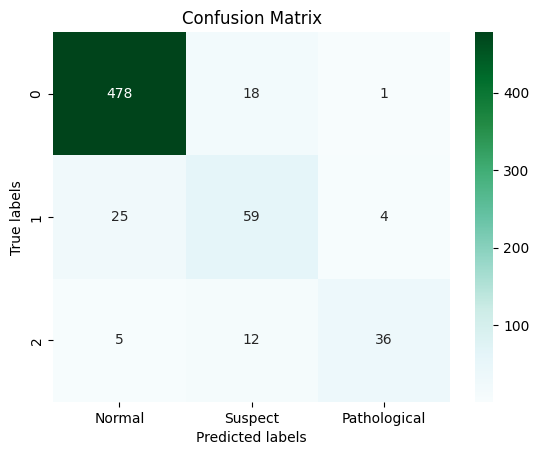

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax=ax, cmap="BuGn", fmt='d')

# labels, title, and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
plt.show()

### **RANDOM FOREST**

In [ ]:

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.915


### **RANDOM FOREST CROSS VALIDATION**

In [ ]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.94556452 0.93548387 0.93548387]
CrossValMeans: 0.939
CrossValStandard Deviation: 0.005


### **RANDOM FOREST CROSS VALIDATION (BEST PARAMS)**

In [ ]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]
              }

In [ ]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=params_RF,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier()


In [ ]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.945


In [ ]:
random_forest = RandomForestClassifier(criterion="gini", n_estimators=100, min_samples_leaf=1, min_samples_split=2, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train, y_train)
score_random_forest_test = random_forest_mod.score(X_test, y_test)

In [ ]:
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.1
Root Mean Square Error for Random Forest = 0.317
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.928


In [ ]:
metrics_data = {
    'Data': ['Train', 'Test'],
    'R^2': [score_random_forest_train, score_random_forest_test]
}

# Crea un DataFrame de pandas con los datos
metrics_df = pd.DataFrame(metrics_data)

# Muestra el DataFrame
print(metrics_df)

    Data       R^2
0  Train  0.999328
1   Test  0.927900


### **Model Performance Analysis**

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       497
           2       0.80      0.73      0.76        88
           3       0.87      0.87      0.87        53

    accuracy                           0.93       638
   macro avg       0.87      0.86      0.86       638
weighted avg       0.93      0.93      0.93       638



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Confusion Matrix:
[[482  11   4]
 [ 21  64   3]
 [  2   5  46]]


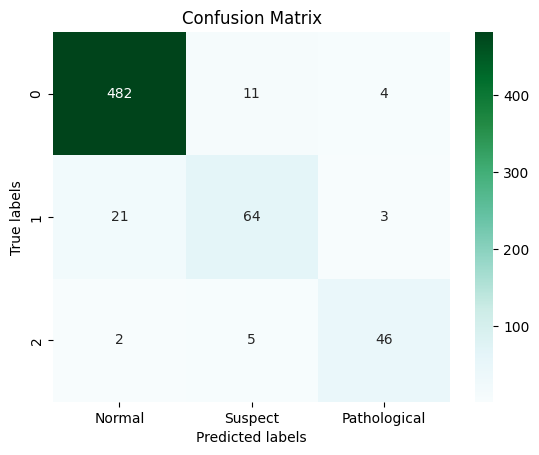

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "BuGn", fmt='d');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

### **GRADIENT BOOSTING**

In [ ]:
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(X_test, y_test), 3)}")

pred_gbc = gbc_mod.predict(X_test)

Baseline gradient boosting classifier: 0.934


### **GRADIENT BOOSTING CROSS VALIDATION**

In [ ]:
scores_GBC = cross_val_score(gbc, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.95967742 0.93548387 0.94354839]
CrossValMeans: 0.946
CrossValStandard Deviation: 0.01


### **GRADIENT BOOSTING CROSS VALIDATION (BEST PARAMS)**

In [ ]:
params_GBC = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

In [ ]:
GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid=params_GBC,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_GBC.fit(X_train, y_train);

Fitting 3 folds for each of 42 candidates, totalling 126 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [ ]:
best_estimator_GBC = GridSearchCV_GBC.best_estimator_
print(f"Best estimator values for GBC model:\n{best_estimator_GBC}")

Best estimator values for GBC model:
GradientBoostingClassifier(loss='deviance', n_estimators=500)


In [ ]:
best_params_GBC = GridSearchCV_GBC.best_params_
print(f"Best parameter values for GBC model:\n{best_params_GBC}")

Best parameter values for GBC model:
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 500}


In [ ]:
best_score_GBC = GridSearchCV_GBC.best_score_
print(f"Best score value foe GBC model: {round(best_score_GBC, 3)}")

Best score value foe GBC model: 0.952


In [ ]:
gbc = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=1, loss="deviance", max_depth=5, max_features="log2", min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200, random_state=42)
gbc_mod = gbc.fit(X_train, y_train)
pred_gbc = gbc_mod.predict(X_test)

mse_gbc = mean_squared_error(y_test, pred_gbc)
rmse_gbc = np.sqrt(mean_squared_error(y_test, pred_gbc))
score_gbc_train = gbc_mod.score(X_train, y_train)
score_gbc_test = gbc_mod.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [ ]:
print(f"Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}")
print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.149
Root Mean Square Error for Gradient Boosting Classifier = 0.386
R^2(coefficient of determination) on training set = 0.998
R^2(coefficient of determination) on testing set = 0.898


In [ ]:
metrics_data = {
    'Data': ['Train', 'Test'],
    'R^2': [score_gbc_train, score_gbc_test]
}

# Crea un DataFrame de pandas con los datos
metrics_df = pd.DataFrame(metrics_data)

# Muestra el DataFrame
print(metrics_df)

    Data       R^2
0  Train  0.997984
1   Test  0.898119


### **Model Performance Analysis**

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

           1       0.95      0.96      0.95       497
           2       0.69      0.69      0.69        88
           3       0.78      0.68      0.73        53

    accuracy                           0.90       638
   macro avg       0.80      0.78      0.79       638
weighted avg       0.90      0.90      0.90       638



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_gbc))

Confusion Matrix:
[[476  15   6]
 [ 23  61   4]
 [  4  13  36]]


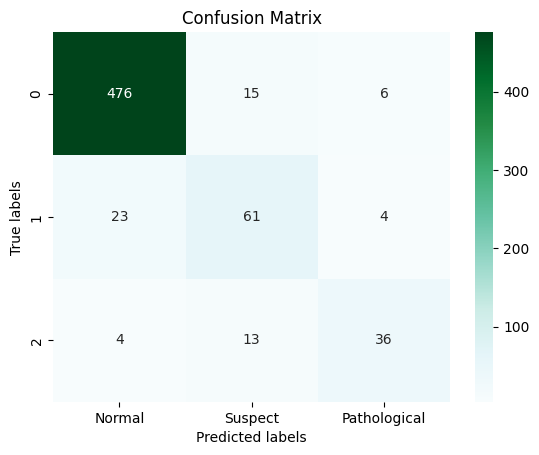

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "BuGn", fmt='d');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

### **XGBOOST**

In [ ]:
import xgboost as xgb
y_train = y_train - 1
y_test = y_test - 1
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
score_xgb_train = xgb_model.score(X_train, y_train)
score_xgb_test = xgb_model.score(X_test, y_test)

print(f"Mean Square Error for XGBoost = {round(mse_xgb, 3)}")
print(f"Root Mean Square Error for XGBoost = {round(rmse_xgb, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_xgb_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_xgb_test, 3)}")

Mean Square Error for XGBoost = 0.091
Root Mean Square Error for XGBoost = 0.302
R^2(coefficient of determination) on training set = 0.985
R^2(coefficient of determination) on testing set = 0.937


In [ ]:
metrics_data = {
    'Data': ['Train', 'Test'],
    'R^2': [score_xgb_train, score_xgb_test]
}

metrics_df = pd.DataFrame(metrics_data)

# Muestra el DataFrame
print(metrics_df)

    Data       R^2
0  Train  0.985215
1   Test  0.937304


In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Calcular el score del modelo
score = xgb_model.score(X_test, y_test)
print(f"Score del modelo XGBoost: {round(score, 3)}")

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test)

Score del modelo XGBoost: 0.937


### **Model Performance Analysis**

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred_xgb))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       497
           1       0.86      0.73      0.79        88
           2       0.91      0.92      0.92        53

    accuracy                           0.94       638
   macro avg       0.91      0.88      0.89       638
weighted avg       0.94      0.94      0.94       638



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Confusion Matrix:
[[485   9   3]
 [ 22  64   2]
 [  3   1  49]]


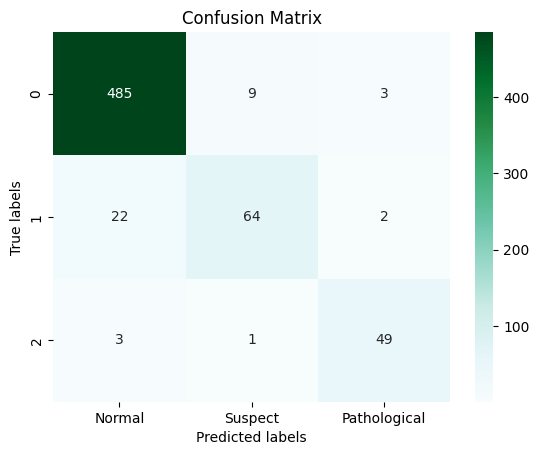

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, ax=ax, cmap="BuGn", fmt='d')

# Etiquetas, título y marcas
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

### **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

In [ ]:
mse_naive_bayes = mean_squared_error(y_test, y_pred_naive_bayes)
rmse_naive_bayes = np.sqrt(mean_squared_error(y_test, y_pred_naive_bayes))
score_naive_bayes_train = naive_bayes_model.score(X_train, y_train)
score_naive_bayes_test = naive_bayes_model.score(X_test, y_test)

print(f"Mean Square Error for Naive Bayes = {round(mse_naive_bayes, 3)}")
print(f"Root Mean Square Error for Naive Bayes = {round(rmse_naive_bayes, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_naive_bayes_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_naive_bayes_test, 3)}")

Mean Square Error for Naive Bayes = 0.259
Root Mean Square Error for Naive Bayes = 0.509
R^2(coefficient of determination) on training set = 0.837
R^2(coefficient of determination) on testing set = 0.807


In [ ]:
metrics_data = {
    'Data': ['Train', 'Test'],
    'R^2': [score_naive_bayes_train, score_naive_bayes_test]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

    Data       R^2
0  Train  0.836694
1   Test  0.807210


In [ ]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Calcular el score del modelo
score = naive_bayes_model.score(X_test, y_test)
print(f"Score del modelo Naive Bayes: {round(score, 3)}")

# Realizar predicciones
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

Score del modelo Naive Bayes: 0.807


### **Model Performance Analysis**

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred_naive_bayes))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       497
           1       0.44      0.81      0.57        88
           2       0.61      0.51      0.56        53

    accuracy                           0.81       638
   macro avg       0.67      0.72      0.67       638
weighted avg       0.86      0.81      0.82       638



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_naive_bayes))

Confusion Matrix:
[[417  70  10]
 [ 10  71   7]
 [  4  22  27]]


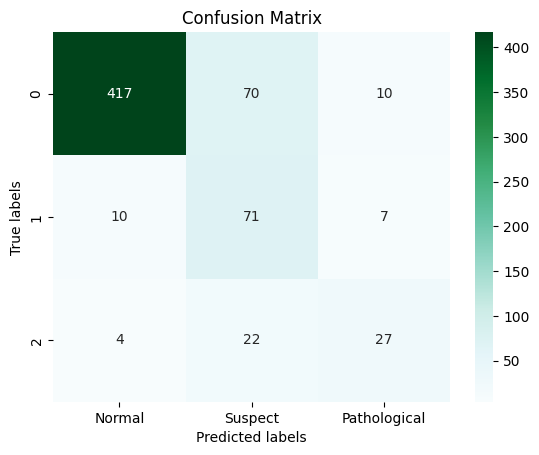

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_naive_bayes), annot=True, ax=ax, cmap="BuGn", fmt='d')

# Etiquetas, título y marcas
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

### **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear', C=1)  # Puedes ajustar el kernel y el hiperparámetro C según tus necesidades
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred_svm = svm_model.predict(X_test)


In [ ]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
score_svm_train = svm_model.score(X_train, y_train)
score_svm_test = svm_model.score(X_test, y_test)

print(f"Mean Square Error for SVM = {round(mse_svm, 3)}")
print(f"Root Mean Square Error for SVM = {round(rmse_svm, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_svm_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_svm_test, 3)}")

Mean Square Error for SVM = 0.129
Root Mean Square Error for SVM = 0.359
R^2(coefficient of determination) on training set = 0.912
R^2(coefficient of determination) on testing set = 0.895


In [ ]:
metrics_data = {
    'Data': ['Train', 'Test'],
    'R^2': [score_svm_train, score_svm_test]
}

metrics_df = pd.DataFrame(metrics_data)

# Muestra el DataFrame
print(metrics_df)

    Data       R^2
0  Train  0.911962
1   Test  0.894984


### **Model Performance Analysis**

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred_svm))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       497
           1       0.63      0.70      0.67        88
           2       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.84      0.78      0.81       638
weighted avg       0.90      0.89      0.90       638



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Confusion Matrix:
[[472  24   1]
 [ 25  62   1]
 [  4  12  37]]


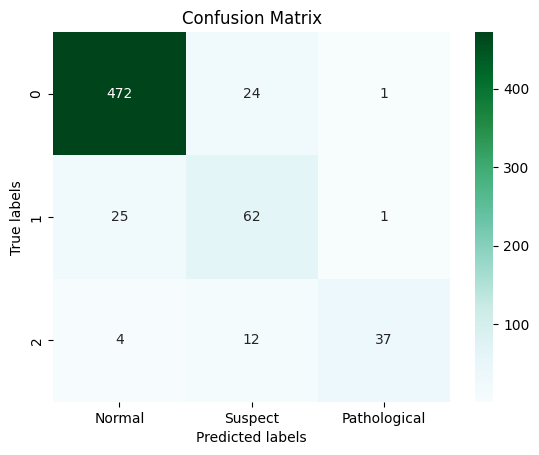

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, ax=ax, cmap="BuGn", fmt='d')

# Etiquetas, título y marcas
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

### **CURVA DE APRENDIZAJE**

In [ ]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

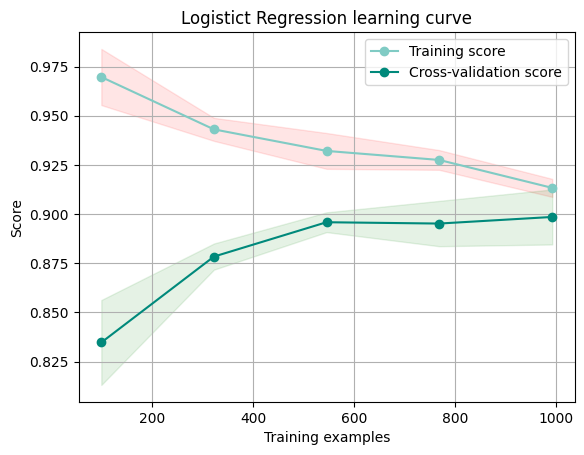

In [ ]:
# Logistic Regression
plot_learning_curve(GridSearchCV_LR.best_estimator_,title = "Logistict Regression learning curve", x = X_train, y = y_train, cv = cv_method);

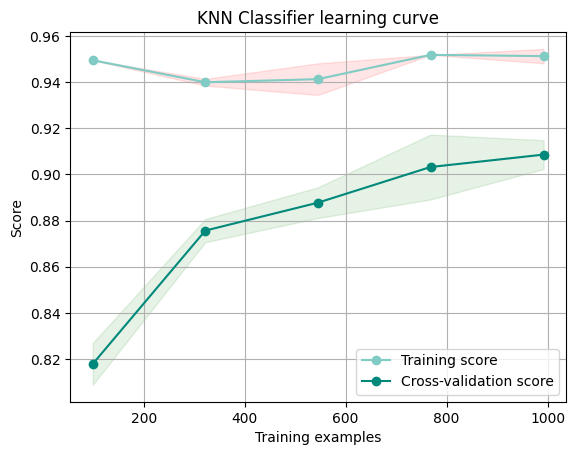

In [ ]:
plot_learning_curve(GridSearchCV_knn.best_estimator_,title = "KNN Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

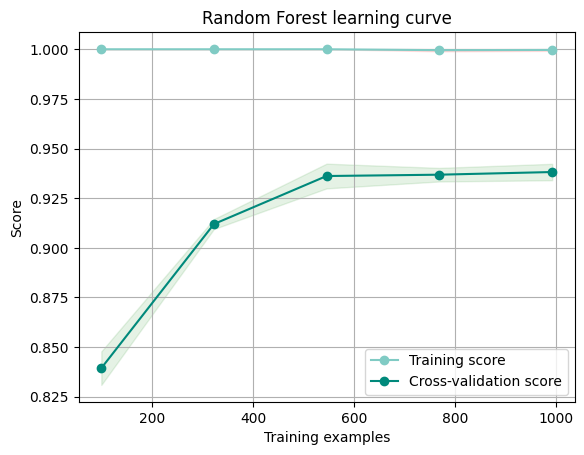

In [ ]:
# Random forest
plot_learning_curve(GridSearchCV_RF.best_estimator_,title = "Random Forest learning curve", x = X_train, y = y_train, cv = cv_method);

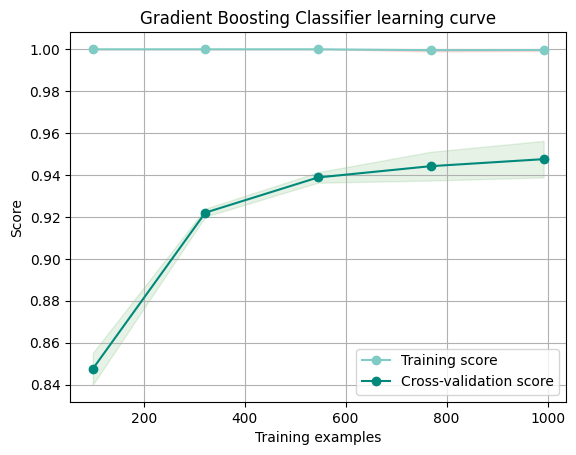

In [ ]:
# Gradient Boosting Classifier
plot_learning_curve(GridSearchCV_GBC.best_estimator_,title = "Gradient Boosting Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

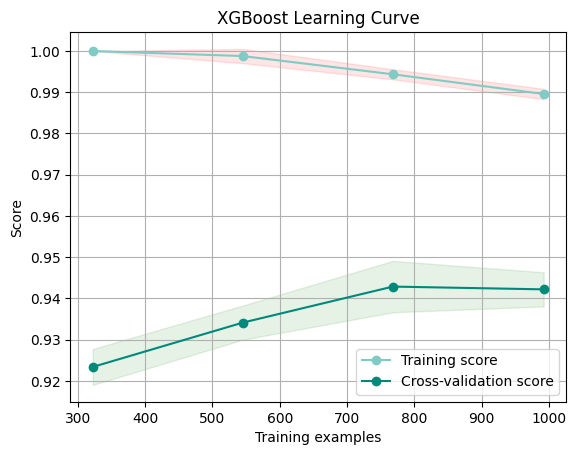

In [ ]:
import xgboost as xgb
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Crear y ajustar el modelo XGBoost
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Luego, para visualizar la curva de aprendizaje:
plot_learning_curve(xgb_model, "XGBoost Learning Curve", X_train, y_train, cv=cv_method)
plt.show()

### **MODEL SELECTION**

In [ ]:
results = pd.DataFrame({
                        "Model": ["Logistic Regression",
                                  "KNN",
                                  "Random Forest",
                                  "Gradient Boosting Classifier",
                                  "XGBoost",
                                  "Naive Bayes",
                                  "SVM"],
                        "Score": [logistic_regression_mod.score(X_test, y_test),
                                  knn_mod.score(X_test, y_test),
                                  random_forest_mod.score(X_test, y_test),
                                  gbc_mod.score(X_test, y_test),
                                  xgb_model.score(X_test, y_test),
                                  naive_bayes_model.score(X_test, y_test),
                                  svm_model.score(X_test, y_test)
                                    ]
                        })

result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(10)

,Model
Score,
0.937304,XGBoost
0.894984,SVM
0.807210,Naive Bayes
0.064263,Logistic Regression
0.057994,KNN
0.056426,Gradient Boosting Classifier
0.040752,Random Forest


In [ ]:
from tabulate import tabulate
data = {
    'Model': ['XGBoost', 'Gradient Boosting Classifier', 'KNN', 'Random Forest', 'SVM', 'Logistic Regression', 'Naive Bayes'],
    'Score': [0.937304, 0.898119, 0.898119, 0.927901, 0.894984, 0.885580, 0.807210]
}

df = pd.DataFrame(data)
sorted_df = df.sort_values(by='Score', ascending=False)

# Mostrar la tabla en un formato más presentable
table = tabulate(sorted_df, headers='keys', tablefmt='fancy_grid', showindex=False)

print(table)


╒══════════════════════════════╤══════════╕
│ Model                        │    Score │
╞══════════════════════════════╪══════════╡
│ XGBoost                      │ 0.937304 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.927901 │
├──────────────────────────────┼──────────┤
│ Gradient Boosting Classifier │ 0.898119 │
├──────────────────────────────┼──────────┤
│ KNN                          │ 0.898119 │
├──────────────────────────────┼──────────┤
│ SVM                          │ 0.894984 │
├──────────────────────────────┼──────────┤
│ Logistic Regression          │ 0.88558  │
├──────────────────────────────┼──────────┤
│ Naive Bayes                  │ 0.80721  │
╘══════════════════════════════╧══════════╛



Los resultados de la fase de selección del modelo se resumen en la tabla anterior. El XGBoost tiene la puntuación más alta con 93%. El Random Forest con una puntuación de 92% tiene un alto porcentaje entre los modelos. El Naive Bayes tiene la puntuación más baja (80%).